In [ ]:
Navaneeth Krishnan
3-11-22

25)Program to implement multiple linear regression  using any
standard dataset available in the public domain and evaluate its 
performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("FuelConsumption.csv")


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [3]:
##Lets select features that we want to use for regression.
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [4]:
#Extracting Independent and dependent Variable
x= df.iloc[:, :-1].values
y= df.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9  6.7  8.5]
 [ 2.4  4.  11.2  7.7  9.6]
 [ 1.5  4.   6.   5.8  5.9]
 ...
 [ 3.   6.  13.4  9.8 11.8]
 [ 3.2  6.  12.9  9.3 11.3]
 [ 3.2  6.  14.9 10.2 12.8]]
[196 221 136 ... 271 260 294]


<AxesSubplot:>

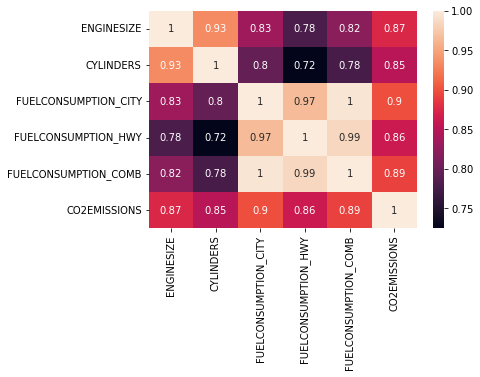

In [14]:
#check the correlation between dependent variables and independent variables
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [6]:
#splitting training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [7]:
#fitteing MLR model to the training set:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [8]:
y_pred=regressor.predict(x_test)
x_pred= regressor.predict(x_train)

In [9]:
print("reggresion coefficients are:",regressor.coef_)
print(regressor.intercept_)

reggresion coefficients are: [ 10.8547316    7.65914224 -11.21595269 -10.47231908  31.14100197]
64.88135054065853


In [10]:
print('Residual sum squares:%.2f' % np.mean((y_pred - y_test)**2))

Residual sum squares:617.32


<AxesSubplot:>

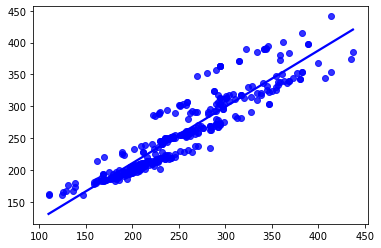

In [11]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

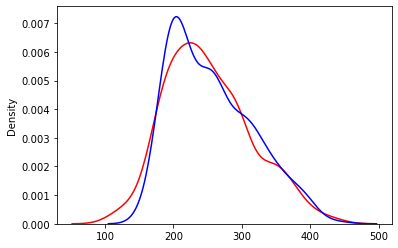

In [12]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)